In [ ]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
import heapq
from itertools import groupby
from skimage import io

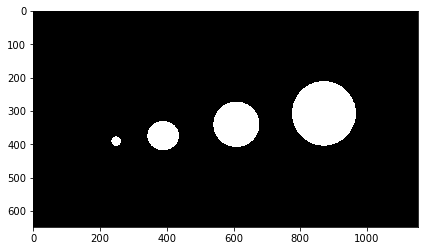

In [159]:
image = skimage.img_as_ubyte(io.imread('Images/image6.png'))
image = skimage.img_as_ubyte(skimage.color.rgb2gray(image))
plt.imshow(image, cmap='Greys_r')
plt.tight_layout()

In [160]:
def apply_filter(img, filter):
    pad_size = len(filter) // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    plt.imshow(padded_img)
    plt.show()
    result = np.empty_like(img)
    for i in range(pad_size, padded_img.shape[0] - pad_size):
        for j in range(pad_size, padded_img.shape[1] - pad_size):
            result[i - pad_size, j - pad_size] =\
            np.min(padded_img[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1] * filter)
    return result.astype(int)

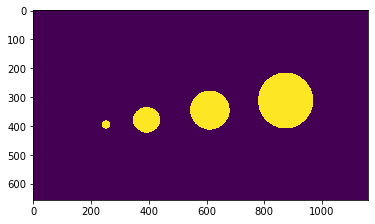

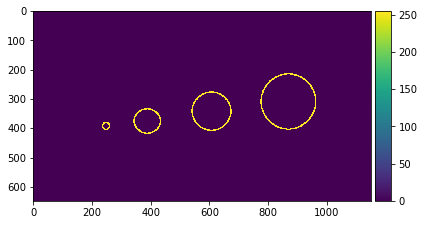

In [161]:
border_filter = np.ones((9, 9))
borders = apply_filter(image, border_filter)
io.imshow(image - borders)

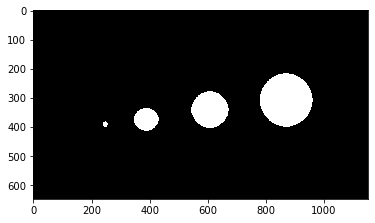

In [162]:
def fill(img, x, y):
    from collections import deque
    img[y, x] = 1
    queue = deque([(x, y)])
    while queue:
        x, y = queue.popleft()
        if img[y, x - 1] == 0:
            img[y, x - 1] = 1
            queue.append((x - 1, y))
        if img[y - 1, x] == 0:
            img[y - 1, x] = 1
            queue.append((x, y - 1))
        if img[y, x + 1] == 0:
            img[y, x + 1] = 1
            queue.append((x + 1, y))
        if img[y + 1, x] == 0:
            img[y + 1, x] = 1
            queue.append((x, y + 1))
            
fill(borders, 100, 200)
plt.imshow(borders, cmap='Greys_r')